In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [78]:
import zipfile 
zip_dir = '/kaggle/input/dogs-vs-cats'
with zipfile.ZipFile(os.path.join(zip_dir, 'train.zip'), 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/train')

with zipfile.ZipFile(os.path.join(zip_dir, 'test1.zip'), 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/test')

In [79]:
train_path = '/kaggle/working/train/train'
test_path = '/kaggle/working/test/test1'

print("Number of training images:", len(os.listdir(train_path)))
print("Number of test images:", len(os.listdir(test_path)))

Number of training images: 25000
Number of test images: 12500


printing the name of images 

In [80]:
file_names = os.listdir(train_path)
print(file_names)

['dog.3803.jpg', 'cat.3433.jpg', 'cat.10546.jpg', 'cat.9105.jpg', 'dog.7672.jpg', 'cat.6157.jpg', 'dog.9826.jpg', 'dog.5592.jpg', 'dog.2571.jpg', 'dog.1883.jpg', 'dog.11284.jpg', 'dog.2584.jpg', 'dog.6401.jpg', 'cat.11116.jpg', 'cat.8700.jpg', 'cat.10851.jpg', 'cat.6033.jpg', 'cat.10574.jpg', 'cat.8394.jpg', 'dog.9744.jpg', 'cat.9022.jpg', 'dog.1760.jpg', 'dog.58.jpg', 'cat.11759.jpg', 'dog.1349.jpg', 'cat.1745.jpg', 'dog.1848.jpg', 'cat.9837.jpg', 'dog.10784.jpg', 'cat.2567.jpg', 'cat.408.jpg', 'dog.6882.jpg', 'cat.5611.jpg', 'cat.11998.jpg', 'cat.3992.jpg', 'dog.5994.jpg', 'dog.4836.jpg', 'dog.9800.jpg', 'cat.1278.jpg', 'cat.2761.jpg', 'cat.3511.jpg', 'dog.4011.jpg', 'cat.45.jpg', 'cat.1662.jpg', 'dog.146.jpg', 'dog.10810.jpg', 'cat.10676.jpg', 'dog.3463.jpg', 'dog.3204.jpg', 'dog.1483.jpg', 'dog.12336.jpg', 'dog.7528.jpg', 'dog.11699.jpg', 'cat.8358.jpg', 'dog.6413.jpg', 'cat.4210.jpg', 'cat.3331.jpg', 'cat.2266.jpg', 'dog.3960.jpg', 'dog.5031.jpg', 'dog.961.jpg', 'dog.9977.jpg', 'd

In [81]:
import numpy as np 
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from sklearn.model_selection import train_test_split 
from google.colab.patches import cv2_imshow 


Displaying the images of dogs and cats 

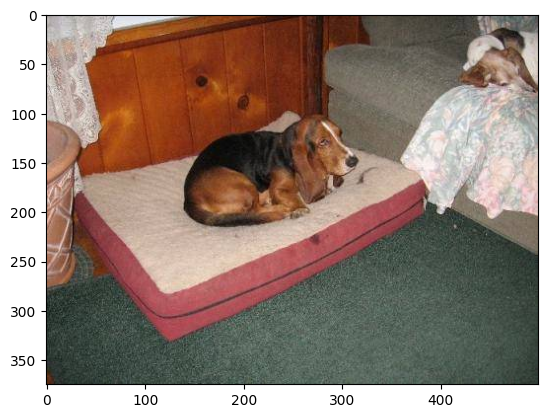

In [82]:
# display dog image 
img = mpimg.imread('/kaggle/working/train/train/dog.2989.jpg')
plt.imshow(img)

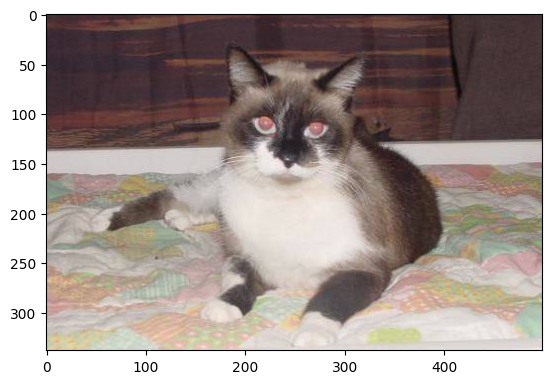

In [83]:
# display cat image 
img = mpimg.imread('/kaggle/working/train/train/cat.9299.jpg')
plt.imshow(img)

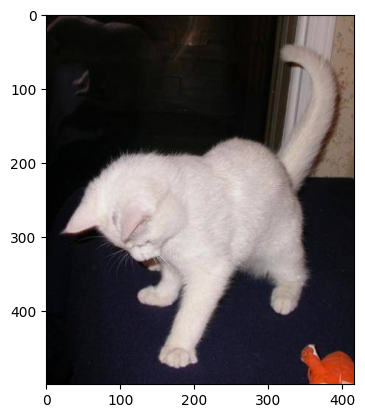

In [84]:
img = mpimg.imread('/kaggle/working/train/train/cat.2212.jpg')
plt.imshow(img)

In [85]:
files_name = os.listdir('/kaggle/working/train/train')
dogs_count = 0 
cats_count = 0 

for file in files_name : 
    name = file[0:3] 
    if name == 'dog' : 
        dogs_count += 1
    else : 
        cats_count += 1

print('the number of dogs images =' , dogs_count)
print('the number of cats images =' , cats_count)
     

the number of dogs images = 12500
the number of cats images = 12500


In [88]:
original_folder = '/kaggle/working/train/train/'
resized_folder = '/kaggle/working/image resized/'

for i in range(2000) : 
    file_name = os.listdir(original_folder)[i]
    image_path = original_folder + file_name
    
    img = Image.open(image_path)
    img = img.resize((224,224))
    img = img.convert('RGB')
    
    Newimg_path =  resized_folder + file_name
    img.save(Newimg_path)



In [89]:
resized_img = os.listdir(resized_folder)
print(resized_img)

['dog.3803.jpg', 'cat.3433.jpg', 'cat.10546.jpg', 'cat.9105.jpg', 'dog.7672.jpg', 'cat.6157.jpg', 'dog.9826.jpg', 'dog.5592.jpg', 'dog.2571.jpg', 'dog.1883.jpg', 'dog.11284.jpg', 'dog.2584.jpg', 'dog.6401.jpg', 'cat.11116.jpg', 'cat.8700.jpg', 'cat.10851.jpg', 'cat.6033.jpg', 'cat.10574.jpg', 'cat.8394.jpg', 'dog.9744.jpg', 'cat.9022.jpg', 'dog.1760.jpg', 'dog.58.jpg', 'cat.11759.jpg', 'dog.1349.jpg', 'cat.1745.jpg', 'dog.1848.jpg', 'cat.9837.jpg', 'dog.10784.jpg', 'cat.2567.jpg', 'cat.408.jpg', 'dog.6882.jpg', 'cat.5611.jpg', 'cat.11998.jpg', 'cat.3992.jpg', 'dog.5994.jpg', 'dog.4836.jpg', 'dog.9800.jpg', 'cat.1278.jpg', 'cat.2761.jpg', 'cat.3511.jpg', 'dog.4011.jpg', 'cat.45.jpg', 'cat.1662.jpg', 'dog.146.jpg', 'dog.10810.jpg', 'cat.10676.jpg', 'dog.3463.jpg', 'dog.3204.jpg', 'dog.1483.jpg', 'dog.12336.jpg', 'dog.7528.jpg', 'dog.11699.jpg', 'cat.8358.jpg', 'dog.6413.jpg', 'cat.4210.jpg', 'cat.3331.jpg', 'cat.2266.jpg', 'dog.3960.jpg', 'dog.5031.jpg', 'dog.961.jpg', 'dog.9977.jpg', 'd

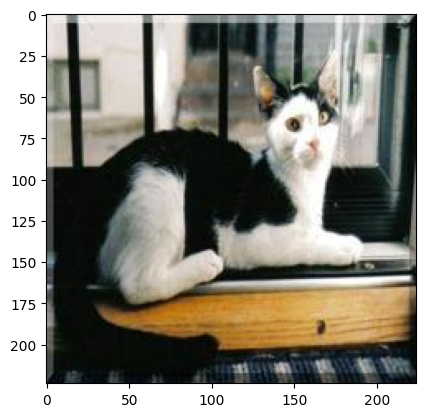

In [90]:
img = mpimg.imread('/kaggle/working/image resized/cat.9105.jpg')
plt.imshow(img)

**Creating labels for resized images of dogs and cats**

Cats --> 0 

Dogs --> 1 

In [91]:
# creating for loop to assign labels 

file_names = os.listdir('/kaggle/working/image resized/')
labels = [] 

for i in range(2000) : 
    file_name = file_names[i]
    label = file_name[0:3]
    
    if label == 'dog':
        labels.append(1)
    else : 
        labels.append(0)
    

In [92]:
print(file_names[0:5])
print(len(file_names))

['dog.3803.jpg', 'cat.3433.jpg', 'cat.10546.jpg', 'cat.9105.jpg', 'dog.7672.jpg']
2000


In [93]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 0, 1]
2000


In [94]:
# counting the images of dogs and cats out of 2000 images

values , counts = np.unique(labels , return_counts = True)
print(values)
print(counts)

[0 1]
[ 997 1003]


**converting all resized images to numpy array**

In [96]:
import glob
import cv2
import numpy as np
image_directory = '/kaggle/working/image resized/'
image_extension = ['png','jpg']

files = []

# Collect all image file paths with the given extensions
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

# Read all images and store them as a NumPy array
dog_cat_images = np.asarray([cv2.imread(file) for file in files])


In [97]:
print(dog_cat_images)

[[[[101 136 170]
   [114 149 183]
   [128 159 192]
   ...
   [188 190 198]
   [198 200 208]
   [204 207 212]]

  [[108 143 177]
   [121 153 188]
   [131 162 195]
   ...
   [192 194 202]
   [202 205 210]
   [208 211 215]]

  [[116 148 183]
   [123 155 190]
   [132 163 196]
   ...
   [197 197 203]
   [206 207 211]
   [211 213 214]]

  ...

  [[ 59  85 132]
   [ 60  86 133]
   [ 62  86 132]
   ...
   [245 252 249]
   [246 251 249]
   [246 253 250]]

  [[ 56  84 131]
   [ 58  86 133]
   [ 62  88 134]
   ...
   [242 251 248]
   [243 250 247]
   [242 251 248]]

  [[ 56  84 131]
   [ 59  87 134]
   [ 64  90 136]
   ...
   [239 248 245]
   [248 255 254]
   [248 255 254]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [98]:
type(dog_cat_images)

numpy.ndarray

In [99]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [100]:
X = dog_cat_images
y = np.asarray(labels)


In [101]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state = 2)

In [102]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training 

400 --> testing 

In [103]:
# scaling the data 

X_train_scaled = X_train / 255 
X_test_scaled = X_test  / 255 


In [104]:
print(X_train_scaled)

[[[[0.45882353 0.42352941 0.34509804]
   [0.43529412 0.39607843 0.3254902 ]
   [0.3372549  0.30588235 0.23921569]
   ...
   [0.28235294 0.28627451 0.3254902 ]
   [0.27843137 0.28235294 0.32156863]
   [0.27843137 0.28235294 0.32156863]]

  [[0.48627451 0.45098039 0.37254902]
   [0.4745098  0.43529412 0.36470588]
   [0.37647059 0.34117647 0.28627451]
   ...
   [0.29019608 0.29411765 0.33333333]
   [0.28627451 0.29019608 0.32941176]
   [0.28235294 0.28627451 0.3254902 ]]

  [[0.50196078 0.4627451  0.39215686]
   [0.50980392 0.47058824 0.4       ]
   [0.42745098 0.39215686 0.3372549 ]
   ...
   [0.29803922 0.30196078 0.34117647]
   [0.29411765 0.29803922 0.3372549 ]
   [0.29019608 0.29411765 0.33333333]]

  ...

  [[0.63137255 0.60784314 0.55686275]
   [0.64705882 0.62352941 0.57254902]
   [0.65490196 0.64313725 0.58823529]
   ...
   [0.30980392 0.2        0.15686275]
   [0.29411765 0.19215686 0.14509804]
   [0.27843137 0.17647059 0.12941176]]

  [[0.63529412 0.61176471 0.56078431]
   [0.6

**Building Neural Network**

In [124]:
import tensorflow as tf
import tensorflow_hub as hub


url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = tf.keras.layers.Lambda(
    lambda x: hub.KerasLayer(url, input_shape=(224, 224, 3), trainable=False)(x)
)

num_classes = 2

inputs = tf.keras.Input(shape=(224, 224, 3))
x = feature_extractor(inputs)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
model.fit(X_train_scaled,y_train,epochs=5)


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 63s 554ms/step - accuracy: 0.7929 - loss: 0.4174
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 555ms/step - accuracy: 0.9696 - loss: 0.0817
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 550ms/step - accuracy: 0.9816 - loss: 0.0578
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 544ms/step - accuracy: 0.9830 - loss: 0.0490
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 558ms/step - accuracy: 0.9898 - loss: 0.0354


In [129]:
score , accuracy = model.evaluate(X_test_scaled,y_test)
print('score =' , score)
print('accuracy =' , accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 539ms/step - accuracy: 0.9901 - loss: 0.0309
score = 0.033121004700660706
accuracy = 0.9900000095367432


**predictive system**

In [ ]:
input_path_image = input('enter the path of the image')

input_img = cv2.imread(input_path_image)

cv2_imshow(img)

resized_img = cv2.resize(input_img,(224,224))

input_image_scaled = resized_img / 255 

img_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(img_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0 : 
    print('the image represents a cat')
else : 
    print('the image represents a dog')
    